In [1]:
import pandas as pd
import numpy as np
import ta

C:\Users\Sally\AppData\Local\Temp\ipykernel_2876\909928169.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv(r'../data/processed/btcusdt_1dprocessed.csv')
df.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,taker_quote_volume
0,2023-02-24,23940.20,24132.35,22841.19,23185.29,343582.57453,2023-02-24 23:59:59.999,8.087524e+09,11531424,170263.13353,4.008150e+09
1,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,2.175284e+09
2,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,2.354572e+09
3,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,3.318354e+09
4,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,3.066250e+09


In [3]:
import sys
sys.path.append('..') #go to project root

from src.Feature_generator import generate_features
df_features = generate_features(df)

In [4]:
df_features.head()

,open_time,open,high,low,close,volume,close_time,quote_asset_volume,num_trades,taker_base_volume,...,macd,macd_signal,macd_diff,bb_high,bb_low,bb_width,volume_ma_7,volume_ratio,high_low_ratio,close_open_ratio
0,2023-02-24,23940.20,24132.35,22841.19,23185.29,343582.57453,2023-02-24 23:59:59.999,8.087524e+09,11531424,170263.13353,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056528,-0.031533
1,2023-02-25,23184.04,23219.13,22722.00,23157.07,191311.81010,2023-02-25 23:59:59.999,4.406286e+09,9124568,94440.13964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021879,-0.001163
2,2023-02-26,23157.07,23689.99,23059.18,23554.85,202323.73623,2023-02-26 23:59:59.999,4.716158e+09,9506015,101003.39278,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027356,0.017177
3,2023-02-27,23554.85,23897.99,23106.77,23492.09,283706.08590,2023-02-27 23:59:59.999,6.659786e+09,11754195,141360.04845,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034242,-0.002664
4,2023-02-28,23492.09,23600.00,23020.97,23141.57,264140.99894,2023-02-28 23:59:59.999,6.172931e+09,9568743,131200.82704,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.025152,-0.014921


In [5]:
df_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open_time           1000 non-null   object 
 1   open                1000 non-null   float64
 2   high                1000 non-null   float64
 3   low                 1000 non-null   float64
 4   close               1000 non-null   float64
 5   volume              1000 non-null   float64
 6   close_time          1000 non-null   object 
 7   quote_asset_volume  1000 non-null   float64
 8   num_trades          1000 non-null   int64  
 9   taker_base_volume   1000 non-null   float64
 10  taker_quote_volume  1000 non-null   float64
 11  return_1d           999 non-null    float64
 12  return_7d           993 non-null    float64
 13  return_30d          970 non-null    float64
 14  volatility_7d       993 non-null    float64
 15  volatility_30d      970 non-null    float64
 16  sma_7  

In [6]:
df_features['macd_signal'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 1000 entries, 0 to 999
Series name: macd_signal
Non-Null Count  Dtype  
--------------  -----  
967 non-null    float64
dtypes: float64(1)
memory usage: 7.9 KB


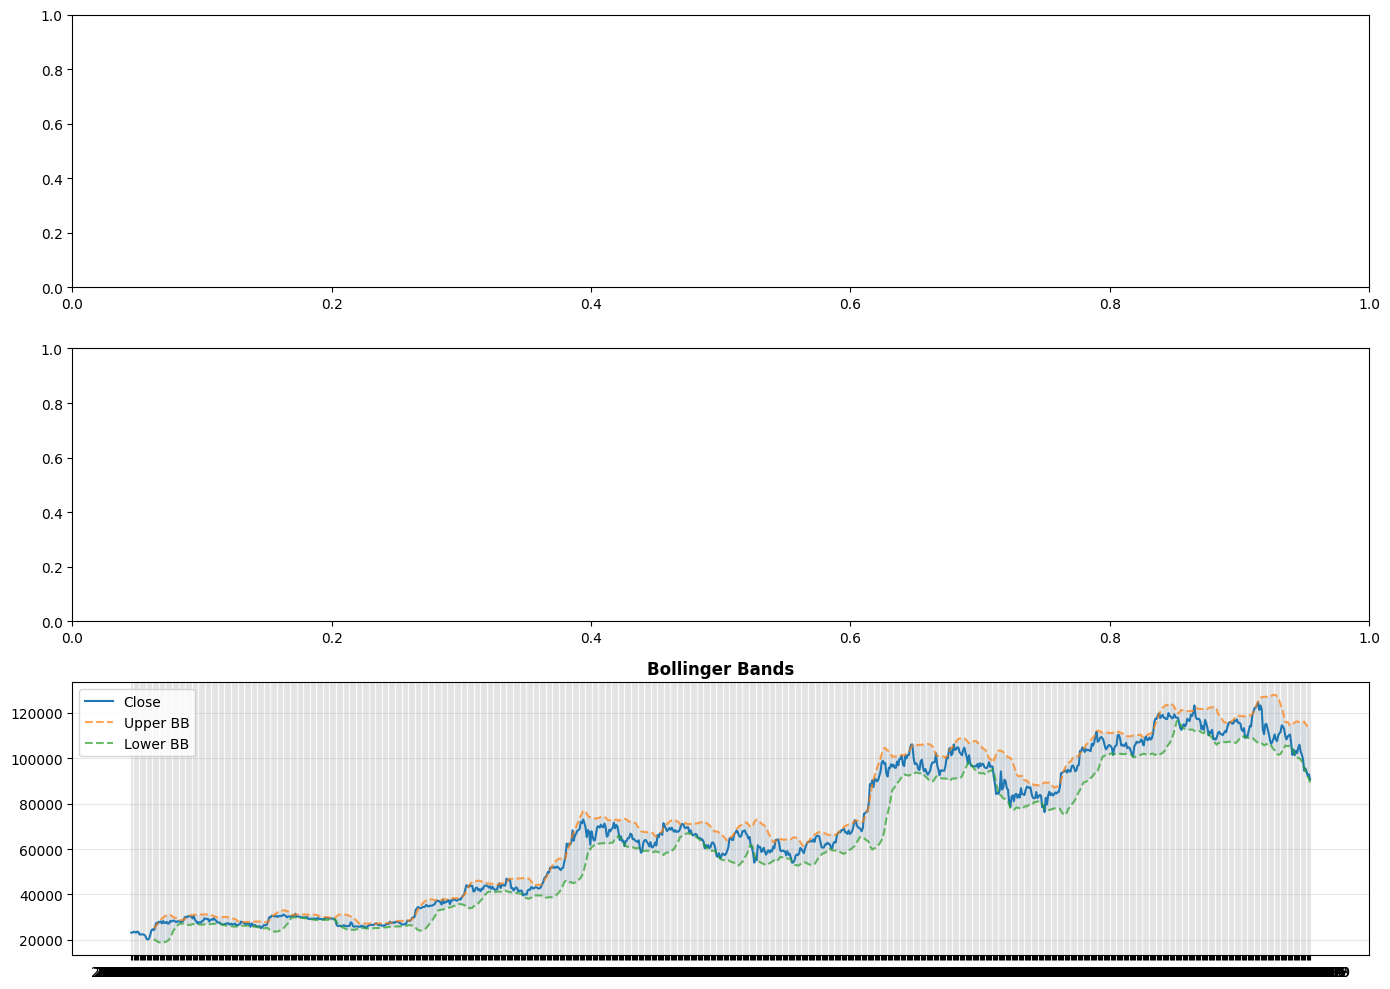

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(3, 1, figsize=(14, 10))
# Bollinger Bands
axes[2].plot(df_features['open_time'], df_features['close'], label='Close', linewidth=1.5)
axes[2].plot(df_features['open_time'], df_features['bb_high'], label='Upper BB', linestyle='--', alpha=0.7)
axes[2].plot(df_features['open_time'], df_features['bb_low'], label='Lower BB', linestyle='--', alpha=0.7)
axes[2].fill_between(df_features['open_time'], df_features['bb_low'], df_features['bb_high'], alpha=0.1)
axes[2].set_title('Bollinger Bands', fontweight='bold')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()